# Cryptocurrency Liquidity Prediction Project


### This notebook demonstrates the end-to-end process of predicting the liquidity ratio of cryptocurrencies using machine learning. It includes data loading, EDA, preprocessing, feature engineering, model training, evaluation, and saving the final model.

### Import libraries and csv files

In [1]:
import pandas as pd
import numpy as np

# Load CSV files
df_2016 = pd.read_csv('coin_gecko_2022-03-16.csv')
df_2017 = pd.read_csv('coin_gecko_2022-03-17.csv')
df_2016

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [2]:
# Convert 'Date' column to datetime
df_2016['date'] = pd.to_datetime(df_2016['date'])
df_2017['date'] = pd.to_datetime(df_2017['date'])
df_2016['date']

0     2022-03-16
1     2022-03-16
2     2022-03-16
3     2022-03-16
4     2022-03-16
         ...    
495   2022-03-16
496   2022-03-16
497   2022-03-16
498   2022-03-16
499   2022-03-16
Name: date, Length: 500, dtype: datetime64[ns]

In [3]:
df_2017['date']

0     2022-03-17
1     2022-03-17
2     2022-03-17
3     2022-03-17
4     2022-03-17
         ...    
495   2022-03-17
496   2022-03-17
497   2022-03-17
498   2022-03-17
499   2022-03-17
Name: date, Length: 500, dtype: datetime64[ns]

### Combining two DataFrames

In [4]:
# Combine the two DataFrames
df = pd.concat([df_2016, df_2017], ignore_index=True)

In [5]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


### Initial Data Inspection and Cleaning

In [6]:
# Sort by date
df = df.sort_values('date')

# Reset index
df.reset_index(drop=True, inplace=True)
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,4.085946e+04,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Iron Bank EURO,IBEUR,1.080000e+00,0.000,-0.004,0.009,9.525810e+04,1.300442e+08,2022-03-16
2,Prometeus,PROM,7.960000e+00,0.017,0.008,0.015,1.069360e+06,1.302007e+08,2022-03-16
3,MaidSafeCoin,MAID,2.949200e-01,0.023,0.010,0.045,3.041720e+03,1.327759e+08,2022-03-16
4,Bezoge Earth,BEZOGE,3.051000e-09,0.012,-0.005,-0.041,1.894020e+05,1.329136e+08,2022-03-16
...,...,...,...,...,...,...,...,...,...
995,Ontology,ONT,5.099020e-01,0.004,0.021,-0.027,2.650433e+07,4.466601e+08,2022-03-17
996,Siacoin,SC,8.924907e-03,0.006,0.002,-0.058,8.429351e+06,4.485693e+08,2022-03-17
997,Baby Doge Coin,BABYDOGE,2.830000e-09,0.004,-0.012,-0.071,9.830393e+06,4.499018e+08,2022-03-17
998,Olympus,OHM,2.785000e+01,0.002,-0.005,-0.147,8.810942e+06,3.911910e+08,2022-03-17


In [7]:
# Display the combined DataFrame info
print("Combined DataFrame shape:", df.shape)
print(df.head())

Combined DataFrame shape: (1000, 9)
             coin  symbol         price     1h    24h     7d    24h_volume  \
0         Bitcoin     BTC  4.085946e+04  0.022  0.030  0.055  3.539076e+10   
1  Iron Bank EURO   IBEUR  1.080000e+00  0.000 -0.004  0.009  9.525810e+04   
2       Prometeus    PROM  7.960000e+00  0.017  0.008  0.015  1.069360e+06   
3    MaidSafeCoin    MAID  2.949200e-01  0.023  0.010  0.045  3.041720e+03   
4    Bezoge Earth  BEZOGE  3.051000e-09  0.012 -0.005 -0.041  1.894020e+05   

        mkt_cap       date  
0  7.709915e+11 2022-03-16  
1  1.300442e+08 2022-03-16  
2  1.302007e+08 2022-03-16  
3  1.327759e+08 2022-03-16  
4  1.329136e+08 2022-03-16  


In [8]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        1000 non-null   object        
 1   symbol      1000 non-null   object        
 2   price       1000 non-null   float64       
 3   1h          993 non-null    float64       
 4   24h         993 non-null    float64       
 5   7d          992 non-null    float64       
 6   24h_volume  993 non-null    float64       
 7   mkt_cap     1000 non-null   float64       
 8   date        1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 70.4+ KB


In [10]:
# Fill missing % change and volume values with 0 (or use df.dropna() if preferred)
df.fillna(0, inplace=True)

### Feature Engineering

In [11]:
# Feature: Liquidity ratio = volume / market cap
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']
df['liquidity_ratio']

0      0.045903
1      0.000733
2      0.008213
3      0.000023
4      0.001425
         ...   
995    0.059339
996    0.018792
997    0.021850
998    0.022523
999    0.000301
Name: liquidity_ratio, Length: 1000, dtype: float64

In [12]:
# Feature: Price volatility proxy (abs change over week)
df['weekly_volatility'] = df['7d'].abs()

In [13]:
# Classification label example (top 25% liquidity as "High")
df['liquidity_class'] = pd.qcut(df['liquidity_ratio'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['liquidity_class'] 

0        High
1         Low
2         Low
3         Low
4         Low
        ...  
995      High
996    Medium
997    Medium
998    Medium
999       Low
Name: liquidity_class, Length: 1000, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [14]:
df.drop_duplicates(inplace=True)
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,weekly_volatility,liquidity_class
0,Bitcoin,BTC,4.085946e+04,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,0.045903,0.055,High
1,Iron Bank EURO,IBEUR,1.080000e+00,0.000,-0.004,0.009,9.525810e+04,1.300442e+08,2022-03-16,0.000733,0.009,Low
2,Prometeus,PROM,7.960000e+00,0.017,0.008,0.015,1.069360e+06,1.302007e+08,2022-03-16,0.008213,0.015,Low
3,MaidSafeCoin,MAID,2.949200e-01,0.023,0.010,0.045,3.041720e+03,1.327759e+08,2022-03-16,0.000023,0.045,Low
4,Bezoge Earth,BEZOGE,3.051000e-09,0.012,-0.005,-0.041,1.894020e+05,1.329136e+08,2022-03-16,0.001425,0.041,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ontology,ONT,5.099020e-01,0.004,0.021,-0.027,2.650433e+07,4.466601e+08,2022-03-17,0.059339,0.027,High
996,Siacoin,SC,8.924907e-03,0.006,0.002,-0.058,8.429351e+06,4.485693e+08,2022-03-17,0.018792,0.058,Medium
997,Baby Doge Coin,BABYDOGE,2.830000e-09,0.004,-0.012,-0.071,9.830393e+06,4.499018e+08,2022-03-17,0.021850,0.071,Medium
998,Olympus,OHM,2.785000e+01,0.002,-0.005,-0.147,8.810942e+06,3.911910e+08,2022-03-17,0.022523,0.147,Medium


In [15]:
df['date'] = pd.to_datetime(df['date'])  # ensure 'date' is datetime

In [16]:
# Remove rows with invalid market caps
df = df[df['mkt_cap'] > 0]
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,weekly_volatility,liquidity_class
0,Bitcoin,BTC,4.085946e+04,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,0.045903,0.055,High
1,Iron Bank EURO,IBEUR,1.080000e+00,0.000,-0.004,0.009,9.525810e+04,1.300442e+08,2022-03-16,0.000733,0.009,Low
2,Prometeus,PROM,7.960000e+00,0.017,0.008,0.015,1.069360e+06,1.302007e+08,2022-03-16,0.008213,0.015,Low
3,MaidSafeCoin,MAID,2.949200e-01,0.023,0.010,0.045,3.041720e+03,1.327759e+08,2022-03-16,0.000023,0.045,Low
4,Bezoge Earth,BEZOGE,3.051000e-09,0.012,-0.005,-0.041,1.894020e+05,1.329136e+08,2022-03-16,0.001425,0.041,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ontology,ONT,5.099020e-01,0.004,0.021,-0.027,2.650433e+07,4.466601e+08,2022-03-17,0.059339,0.027,High
996,Siacoin,SC,8.924907e-03,0.006,0.002,-0.058,8.429351e+06,4.485693e+08,2022-03-17,0.018792,0.058,Medium
997,Baby Doge Coin,BABYDOGE,2.830000e-09,0.004,-0.012,-0.071,9.830393e+06,4.499018e+08,2022-03-17,0.021850,0.071,Medium
998,Olympus,OHM,2.785000e+01,0.002,-0.005,-0.147,8.810942e+06,3.911910e+08,2022-03-17,0.022523,0.147,Medium


### Feature Scaling

In [17]:
# We’ll normalize features like price, volume, mkt_cap, liquidity_ratio, weekly_volatility

from sklearn.preprocessing import MinMaxScaler

# Columns to scale
scale_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio', 'weekly_volatility']

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaler
df_scaled = df.copy()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

### EDA

In [18]:
# Exploratory Data Analysis (EDA)
# Summary Statistics

print(df_scaled.describe())

             price           1h          24h           7d   24h_volume  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.015918     0.893185     0.547482     0.112538     0.004959   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000005     0.882040     0.529027     0.100223     0.000029   
50%       0.000027     0.888611     0.540474     0.108014     0.000142   
75%       0.000175     0.904881     0.556827     0.114983     0.000677   
max       1.000000     1.000000     1.000000     1.000000     1.000000   
std       0.111231     0.033607     0.048347     0.044303     0.047645   

           mkt_cap                 date  liquidity_ratio  weekly_volatility  
count  1000.000000                 1000      1000.000000        1000.000000  
mean      0.004754  2022-03-16 12:00:00         0.017318           0.017870  
min       0.000000  2022-03-16 00:00:00         0.000000           0.000000  
25%       0.000064  2

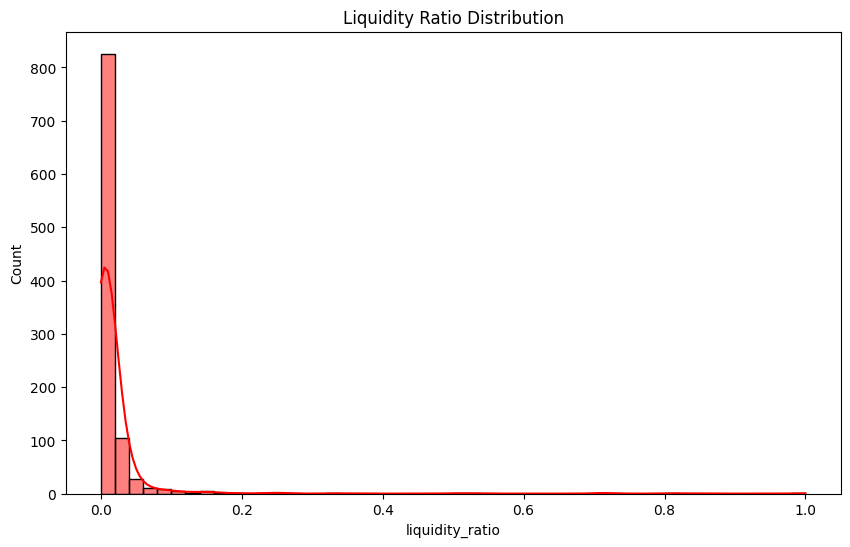

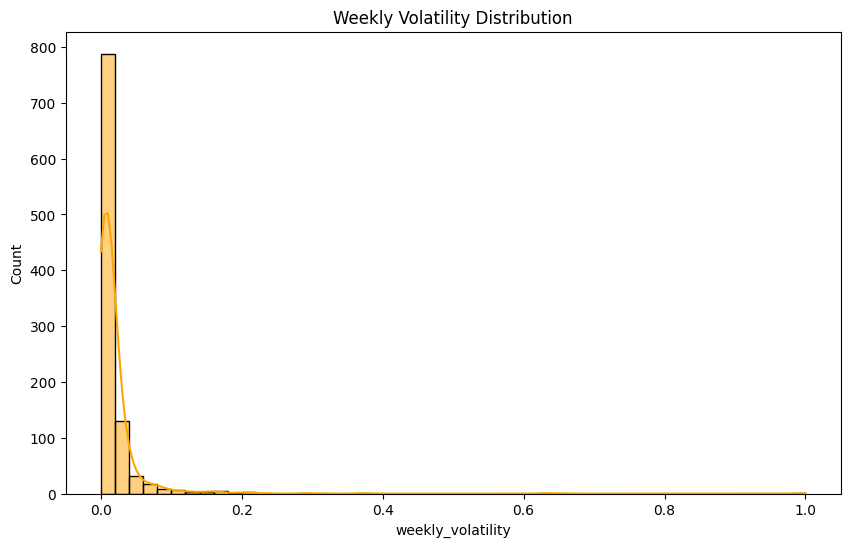

In [20]:
# Distribution Plots

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['liquidity_ratio'], bins=50, kde=True, color='red')
plt.title('Liquidity Ratio Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['weekly_volatility'], bins=50, kde=True, color='orange')
plt.title('Weekly Volatility Distribution')
plt.show()

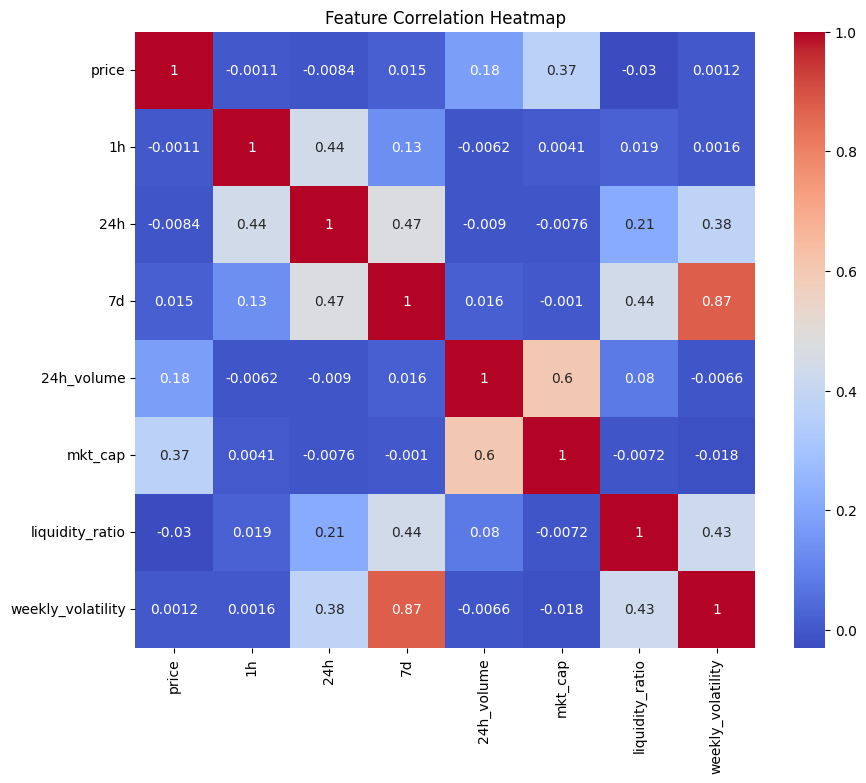

In [21]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
corr = df_scaled[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio', 'weekly_volatility']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\Progati Podder\AppData\Local\Temp\ipykernel_8840\2658788286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='liquidity_class', data=df_scaled, palette='viridis')


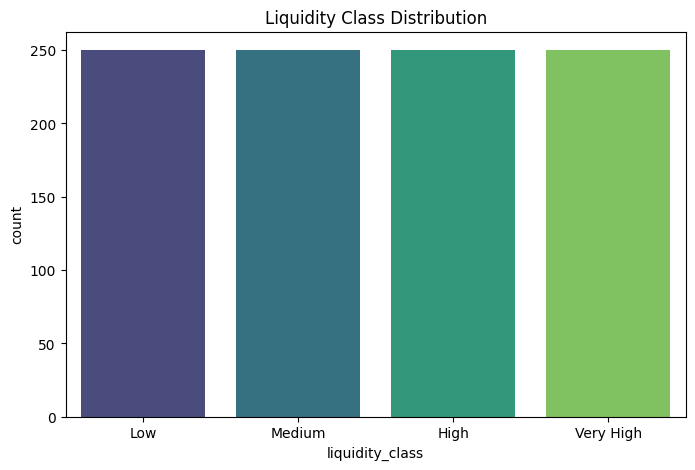

In [28]:
# Liquidity Class Countplot

plt.figure(figsize=(8, 5))
sns.countplot(x='liquidity_class', data=df_scaled, palette='viridis')
plt.title('Liquidity Class Distribution')
plt.show()

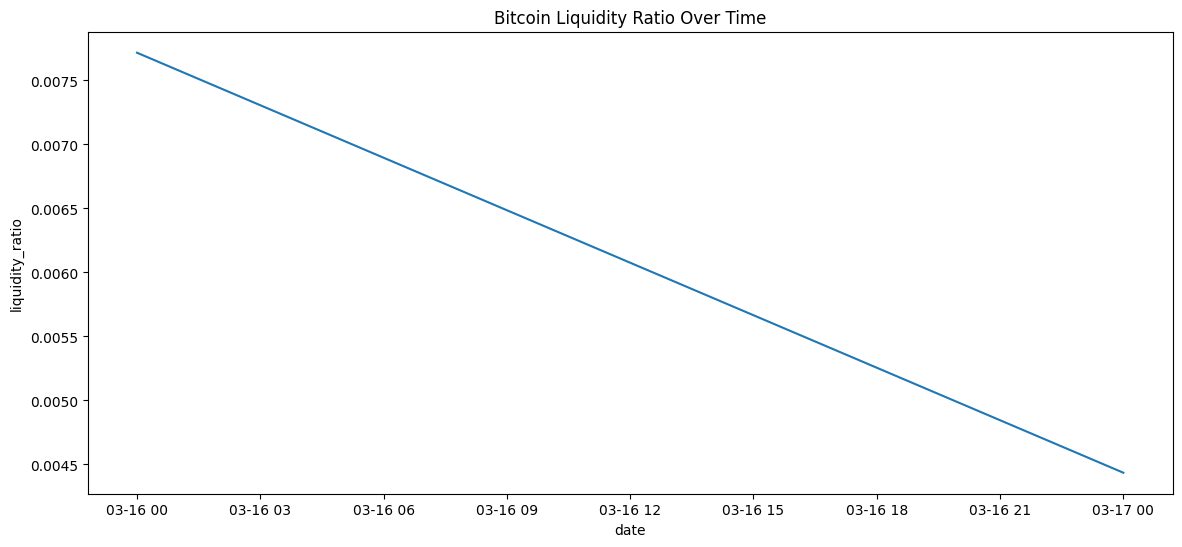

In [22]:
# Time Series Trend (Liquidity Ratio over time for Bitcoin)

plt.figure(figsize=(14, 6))
btc_df = df_scaled[df_scaled['symbol'] == 'BTC']
sns.lineplot(x='date', y='liquidity_ratio', data=btc_df)
plt.title('Bitcoin Liquidity Ratio Over Time')
plt.show()

### Advanced Feature Engineering

In [23]:
# Feature Engineering

# Moving Averages (MA): Create rolling averages for price and 24h_volume to capture trends

# Sort for rolling calculation
df_scaled = df_scaled.sort_values(['symbol', 'date'])

# Rolling windows
df_scaled['price_MA7'] = df_scaled.groupby('symbol')['price'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df_scaled['volume_MA7'] = df_scaled.groupby('symbol')['24h_volume'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

In [24]:
df_scaled['price_MA7']

390    0.000080
888    0.000080
288    0.000036
874    0.000036
311    0.003335
         ...   
934    0.000128
226    0.000008
732    0.000007
489    0.000012
994    0.000012
Name: price_MA7, Length: 1000, dtype: float64

In [25]:
df_scaled['volume_MA7'] 

390    5.280866e-05
888    4.665459e-05
288    2.079178e-03
874    1.593185e-03
311    4.873332e-03
           ...     
934    6.973231e-07
226    3.454943e-06
732    6.739384e-06
489    5.059000e-04
994    4.620147e-04
Name: volume_MA7, Length: 1000, dtype: float64

In [26]:
# Price Volatility (Standard Deviation)

# Rolling volatility (std deviation) of price over 7 days:

df_scaled['price_volatility_7d'] = df_scaled.groupby('symbol')['price'].transform(lambda x: x.rolling(window=7, min_periods=1).std())
df_scaled

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,weekly_volatility,liquidity_class,price_MA7,volume_MA7,price_volatility_7d
390,Tenset,10SET,0.000080,0.901126,0.552739,0.192025,5.280866e-05,0.000288,2022-03-16,0.001778,0.094184,Medium,0.000080,5.280866e-05,NaN
888,Tenset,10SET,0.000080,0.882353,0.530662,0.174797,4.050053e-05,0.000289,2022-03-17,0.001359,0.074870,Low,0.000080,4.665459e-05,1.715559e-07
288,1inch,1INCH,0.000036,0.907384,0.618970,0.139566,2.079178e-03,0.000709,2022-03-16,0.032865,0.035373,Very High,0.000036,2.079178e-03,NaN
874,1inch,1INCH,0.000036,0.891114,0.525756,0.124855,1.107192e-03,0.000711,2022-03-17,0.017463,0.018880,Very High,0.000036,1.593185e-03,1.715559e-07
311,Aave,AAVE,0.003335,0.927409,0.635323,0.132985,4.873332e-03,0.002315,2022-03-16,0.025489,0.027995,Very High,0.003335,4.873332e-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Zenon,ZNN,0.000126,0.889862,0.506950,0.085947,6.581669e-07,0.000247,2022-03-17,0.000025,0.024740,Low,0.000128,6.973231e-07,2.401783e-06
226,ZoidPay,ZPAY,0.000008,0.927409,0.568275,0.169957,3.454943e-06,0.000031,2022-03-16,0.000375,0.069444,Low,0.000008,3.454943e-06,NaN
732,ZoidPay,ZPAY,0.000007,0.876095,0.513491,0.149051,1.002383e-05,0.000030,2022-03-17,0.001098,0.046007,Low,0.000007,6.739384e-06,9.663747e-08
489,0x,ZRX,0.000012,0.912390,0.556827,0.113434,5.059000e-04,0.000467,2022-03-16,0.011514,0.006076,High,0.000012,5.059000e-04,NaN


In [27]:
# Liquidity Ratio Momentum: Momentum is difference in liquidity ratio over 1 day and 7 days:

df_scaled['liquidity_momentum_1d'] = df_scaled.groupby('symbol')['liquidity_ratio'].diff(1)
df_scaled['liquidity_momentum_7d'] = df_scaled.groupby('symbol')['liquidity_ratio'].diff(7)

In [28]:
df_scaled

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,weekly_volatility,liquidity_class,price_MA7,volume_MA7,price_volatility_7d,liquidity_momentum_1d,liquidity_momentum_7d
390,Tenset,10SET,0.000080,0.901126,0.552739,0.192025,5.280866e-05,0.000288,2022-03-16,0.001778,0.094184,Medium,0.000080,5.280866e-05,NaN,NaN,NaN
888,Tenset,10SET,0.000080,0.882353,0.530662,0.174797,4.050053e-05,0.000289,2022-03-17,0.001359,0.074870,Low,0.000080,4.665459e-05,1.715559e-07,-0.000418,NaN
288,1inch,1INCH,0.000036,0.907384,0.618970,0.139566,2.079178e-03,0.000709,2022-03-16,0.032865,0.035373,Very High,0.000036,2.079178e-03,NaN,NaN,NaN
874,1inch,1INCH,0.000036,0.891114,0.525756,0.124855,1.107192e-03,0.000711,2022-03-17,0.017463,0.018880,Very High,0.000036,1.593185e-03,1.715559e-07,-0.015403,NaN
311,Aave,AAVE,0.003335,0.927409,0.635323,0.132985,4.873332e-03,0.002315,2022-03-16,0.025489,0.027995,Very High,0.003335,4.873332e-03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Zenon,ZNN,0.000126,0.889862,0.506950,0.085947,6.581669e-07,0.000247,2022-03-17,0.000025,0.024740,Low,0.000128,6.973231e-07,2.401783e-06,-0.000003,NaN
226,ZoidPay,ZPAY,0.000008,0.927409,0.568275,0.169957,3.454943e-06,0.000031,2022-03-16,0.000375,0.069444,Low,0.000008,3.454943e-06,NaN,NaN,NaN
732,ZoidPay,ZPAY,0.000007,0.876095,0.513491,0.149051,1.002383e-05,0.000030,2022-03-17,0.001098,0.046007,Low,0.000007,6.739384e-06,9.663747e-08,0.000723,NaN
489,0x,ZRX,0.000012,0.912390,0.556827,0.113434,5.059000e-04,0.000467,2022-03-16,0.011514,0.006076,High,0.000012,5.059000e-04,NaN,NaN,NaN


In [29]:
df_scaled.liquidity_momentum_7d

390   NaN
888   NaN
288   NaN
874   NaN
311   NaN
       ..
934   NaN
226   NaN
732   NaN
489   NaN
994   NaN
Name: liquidity_momentum_7d, Length: 1000, dtype: float64

In [30]:
df_scaled['liquidity_momentum_1d'].fillna(0, inplace=True)
df_scaled['liquidity_momentum_7d'].fillna(0, inplace=True)
df_scaled

C:\Users\Progati Podder\AppData\Local\Temp\ipykernel_16424\2089302795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_scaled['liquidity_momentum_1d'].fillna(0, inplace=True)


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_ratio,weekly_volatility,liquidity_class,price_MA7,volume_MA7,price_volatility_7d,liquidity_momentum_1d,liquidity_momentum_7d
390,Tenset,10SET,0.000080,0.901126,0.552739,0.192025,5.280866e-05,0.000288,2022-03-16,0.001778,0.094184,Medium,0.000080,5.280866e-05,NaN,0.000000,0.0
888,Tenset,10SET,0.000080,0.882353,0.530662,0.174797,4.050053e-05,0.000289,2022-03-17,0.001359,0.074870,Low,0.000080,4.665459e-05,1.715559e-07,-0.000418,0.0
288,1inch,1INCH,0.000036,0.907384,0.618970,0.139566,2.079178e-03,0.000709,2022-03-16,0.032865,0.035373,Very High,0.000036,2.079178e-03,NaN,0.000000,0.0
874,1inch,1INCH,0.000036,0.891114,0.525756,0.124855,1.107192e-03,0.000711,2022-03-17,0.017463,0.018880,Very High,0.000036,1.593185e-03,1.715559e-07,-0.015403,0.0
311,Aave,AAVE,0.003335,0.927409,0.635323,0.132985,4.873332e-03,0.002315,2022-03-16,0.025489,0.027995,Very High,0.003335,4.873332e-03,NaN,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Zenon,ZNN,0.000126,0.889862,0.506950,0.085947,6.581669e-07,0.000247,2022-03-17,0.000025,0.024740,Low,0.000128,6.973231e-07,2.401783e-06,-0.000003,0.0
226,ZoidPay,ZPAY,0.000008,0.927409,0.568275,0.169957,3.454943e-06,0.000031,2022-03-16,0.000375,0.069444,Low,0.000008,3.454943e-06,NaN,0.000000,0.0
732,ZoidPay,ZPAY,0.000007,0.876095,0.513491,0.149051,1.002383e-05,0.000030,2022-03-17,0.001098,0.046007,Low,0.000007,6.739384e-06,9.663747e-08,0.000723,0.0
489,0x,ZRX,0.000012,0.912390,0.556827,0.113434,5.059000e-04,0.000467,2022-03-16,0.011514,0.006076,High,0.000012,5.059000e-04,NaN,0.000000,0.0


### Model Training: Classification (Liquidity Class)

In [31]:
# Model Selection AND Training
# Define Features and Target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features for training
features = [
    'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
    'liquidity_ratio', 'weekly_volatility',
    'price_MA7', 'volume_MA7',
    'price_volatility_7d', 'liquidity_momentum_1d', 'liquidity_momentum_7d'
]

X = df_scaled[features]

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(df_scaled['liquidity_class'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

In [33]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.98      0.99        59
         Low       0.98      1.00      0.99        44
      Medium       0.98      0.98      0.98        51
   Very High       1.00      1.00      1.00        46

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



### Feature Importance Visualization

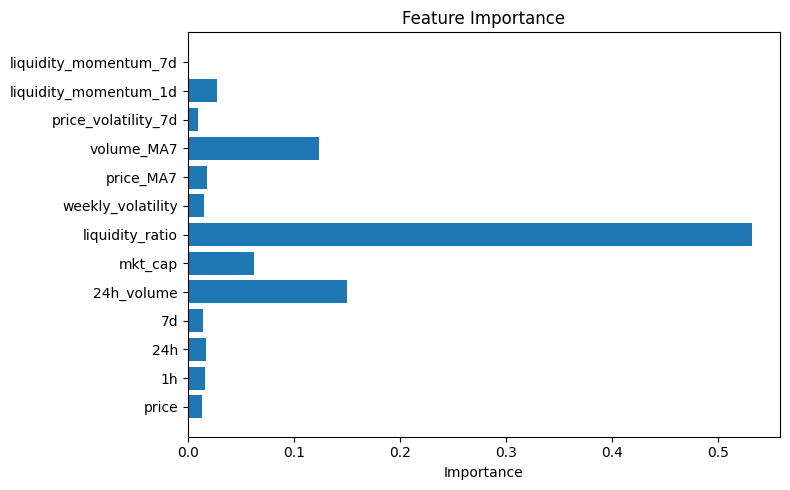

In [34]:
# Get feature importances

importances = rf_model.feature_importances_
feature_names = X.columns

# Plot top features
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

### Model Training: Regression (Liquidity Ratio)

In [35]:
# Model Evaluation

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define target as numeric
y_reg = df_scaled['liquidity_ratio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict
y_pred = rf_reg.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.0090
MAE: 0.0012
R²: 0.9848


### Hyperparameter Tuning (Grid Search)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated score: 0.927391484770058


In [37]:
# Replace your rf_model with the best model
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(min_samples_split=5, random_state=42)

In [38]:
# Predict on the test set
y_pred_best = best_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate MSE 
mse = mean_squared_error(y_test, y_pred_best)

# Calculate RMSE by taking sqrt of MSE
rmse = np.sqrt(mse)

# Calculate other metrics
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")


Test RMSE: 0.0146
Test MAE: 0.0019
Test R² Score: 0.9599


### Model Persistence

In [40]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_model.joblib')

['best_model.joblib']

In [41]:
import os
os.getcwd()

'C:\\Users\\Progati Podder'

In [42]:
import os
os.getcwd()

'C:\\Users\\Progati Podder'

In [43]:
import os
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 'app.py',
 'AppData',
 'Application Data',
 'battery-report.html',
 'best_model.joblib',
 'CLUSTERING.ipynb',
 'coin_gecko_2022-03-16.csv',
 'coin_gecko_2022-03-17.csv',
 'Contacts',
 'Cookies',
 'Cryptocurrency_ML_Project.ipynb',
 'CryptoLiquidityPrediction',
 'Documents',
 'Downloads',
 'Favorites',
 'Final_Report.md',
 'High_Level_Design.md',
 'Links',
 'Local Settings',
 'Low_Level_Design.md',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'Pipeline_Architecture.md',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendT

In [45]:
import os

project_folder = r"C:\Users\Progati Podder\CryptoLiquidityPrediction"
models_path = os.path.join(project_folder, "models")

# Create models folder if not exists
os.makedirs(models_path, exist_ok=True)
print(f"Models folder ready at: {models_path}")


Models folder ready at: C:\Users\Progati Podder\CryptoLiquidityPrediction\models


In [46]:
import shutil

src = r"C:\Users\Progati Podder\best_model.joblib"
dst = os.path.join(models_path, "best_model.joblib")

shutil.move(src, dst)
print(f"Moved best_model.joblib to {dst}")


Moved best_model.joblib to C:\Users\Progati Podder\CryptoLiquidityPrediction\models\best_model.joblib


In [47]:
print(os.listdir(models_path))


['best_model.joblib']
